In [55]:
print("Вариант: " + str(60%16+1))

Вариант: 13


In [ ]:
# Чтение log-файла
Shark_logs = open("Spark_2k.log", "r").readlines()

In [6]:
# Просмотр log-файла
for log in Shark_logs:
    print(log)

17/06/09 20:10:40 INFO executor.CoarseGrainedExecutorBackend: Registered signal handlers for [TERM, HUP, INT]

17/06/09 20:10:40 INFO spark.SecurityManager: Changing view acls to: yarn,curi

17/06/09 20:10:40 INFO spark.SecurityManager: Changing modify acls to: yarn,curi

17/06/09 20:10:40 INFO spark.SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(yarn, curi); users with modify permissions: Set(yarn, curi)

17/06/09 20:10:41 INFO spark.SecurityManager: Changing view acls to: yarn,curi

17/06/09 20:10:41 INFO spark.SecurityManager: Changing modify acls to: yarn,curi

17/06/09 20:10:41 INFO spark.SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(yarn, curi); users with modify permissions: Set(yarn, curi)

17/06/09 20:10:41 INFO slf4j.Slf4jLogger: Slf4jLogger started

17/06/09 20:10:41 INFO Remoting: Starting remoting

17/06/09 20:10:41 INFO Remoting: Remoting started;

In [22]:
# Пример строки
print(Shark_logs[0])

17/06/09 20:10:40 INFO executor.CoarseGrainedExecutorBackend: Registered signal handlers for [TERM, HUP, INT]



In [48]:
import re

# Хранение норманилозанных записей лога
normalize_Shark_logs = []

for log in Shark_logs:
    # Определение шаблона с использованием регулярных выражений
    pattern = re.compile(r'(\d{2}/\d{2}/\d{2}) (\d{2}:\d{2}:\d{2}) (\w+) ([\w.]+): (.*)')

    # Поиск соответствий в строке
    match = pattern.match(log)

    # Извлечение информации
    if match:
        date = match.group(1)
        time = match.group(2)
        log_level = match.group(3)
        log_type = match.group(4)
        info = match.group(5).strip()
        
        normalize_Shark_logs.append([date, time, log_level, log_type, info])
        
        # Печать одной записи
        # print(f"Дата: {date}")
        # print(f"Время: {time}")
        # print(f"Уровень лога: {log_level}")
        # print(f"Тип лога: {log_type}")
        # print(f"Информация: {info}")
    else:
        print(log)
        print("Строка не соответствует ожидаемому формату лога.")

# Вывод нормализованных значений

for log in normalize_Shark_logs:
    print(log)

['17/06/09', '20:10:40', 'INFO', 'executor.CoarseGrainedExecutorBackend', 'Registered signal handlers for [TERM, HUP, INT]']
['17/06/09', '20:10:40', 'INFO', 'spark.SecurityManager', 'Changing view acls to: yarn,curi']
['17/06/09', '20:10:40', 'INFO', 'spark.SecurityManager', 'Changing modify acls to: yarn,curi']
['17/06/09', '20:10:40', 'INFO', 'spark.SecurityManager', 'SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(yarn, curi); users with modify permissions: Set(yarn, curi)']
['17/06/09', '20:10:41', 'INFO', 'spark.SecurityManager', 'Changing view acls to: yarn,curi']
['17/06/09', '20:10:41', 'INFO', 'spark.SecurityManager', 'Changing modify acls to: yarn,curi']
['17/06/09', '20:10:41', 'INFO', 'spark.SecurityManager', 'SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(yarn, curi); users with modify permissions: Set(yarn, curi)']
['17/06/09', '20:10:41', 'INFO', 'slf4j.Slf4jLogger', 'Slf4jLogger 

In [61]:
# Подключение базы данных
import sqlite3
# Библиотека для удобной работы с табличными данными
import pandas as pd
# Создание СУБД
connection = sqlite3.connect('logs.db')
cursor = connection.cursor()
cursor.execute("DROP TABLE IF EXISTS logs")
cursor.execute("CREATE TABLE logs (id INTEGER PRIMARY KEY AUTOINCREMENT, date text, time text, level text, type text, information text)")

# Внесение данных в СУБД
for log in normalize_Shark_logs:
  query = f'INSERT INTO logs (date, time, level, type, information) VALUES ("{log[0]}", "{log[1]}", "{log[2]}", "{log[3]}", "{log[4]}")'
  try:
    cursor.execute(query)
  except:
    print(query)

# Закрытие СУБД
connection.commit()
cursor.close()
connection.close()

# Открытие СУБД
connection = sqlite3.connect('logs.db')
cursor = connection.cursor()
cursor.execute("SELECT * FROM logs")
data = cursor.fetchall()
cursor.close()
connection.close()
pd_data = pd.DataFrame(data, columns=("i", "Дата", "Время", "Уровень", "Тип", "Информация"))
pd_data
     


,i,Дата,Время,Уровень,Тип,Информация
0,1,17/06/09,20:10:40,INFO,executor.CoarseGrainedExecutorBackend,"Registered signal handlers for [TERM, HUP, INT]"
1,2,17/06/09,20:10:40,INFO,spark.SecurityManager,"Changing view acls to: yarn,curi"
2,3,17/06/09,20:10:40,INFO,spark.SecurityManager,"Changing modify acls to: yarn,curi"
3,4,17/06/09,20:10:40,INFO,spark.SecurityManager,SecurityManager: authentication disabled; ui a...
4,5,17/06/09,20:10:41,INFO,spark.SecurityManager,"Changing view acls to: yarn,curi"
...,...,...,...,...,...,...
1995,1996,17/06/09,20:11:11,INFO,storage.BlockManager,Found block rdd_42_30 locally
1996,1997,17/06/09,20:11:11,INFO,executor.Executor,Finished task 29.0 in stage 29.0 (TID 1349). 2...
1997,1998,17/06/09,20:11:11,INFO,executor.CoarseGrainedExecutorBackend,Got assigned task 1354
1998,1999,17/06/09,20:11:11,INFO,executor.Executor,Running task 34.0 in stage 29.0 (TID 1354)


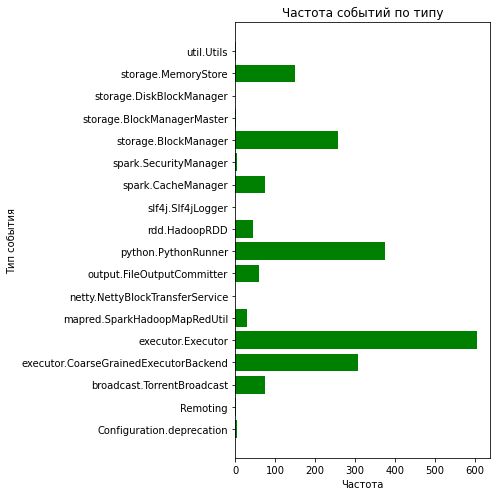

In [89]:
# Библиотека для визуализации данных
import matplotlib.pyplot as plt

# Открытие СУБД
connection = sqlite3.connect('logs.db')

# Чтение данных из таблицы в DataFrame
query = "SELECT type, COUNT(*) as count FROM logs GROUP BY type"
df = pd.read_sql_query(query, connection)

# Закрытие СУБД
connection.close()

# Визуализация данных с вращением подписей по оси x
plt.figure(figsize=(7, 7))
plt.barh(df['type'], df['count'], color='green')
plt.xlabel('Частота')
plt.ylabel('Тип события')
plt.title('Частота событий по типу')
plt.tight_layout()  # Автоматически корректирует расположение элементов графика для лучшей читаемости
plt.show()
